Shape:  (150, 6)
Columns:  ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
First 5 rows:     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

 dataset info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non

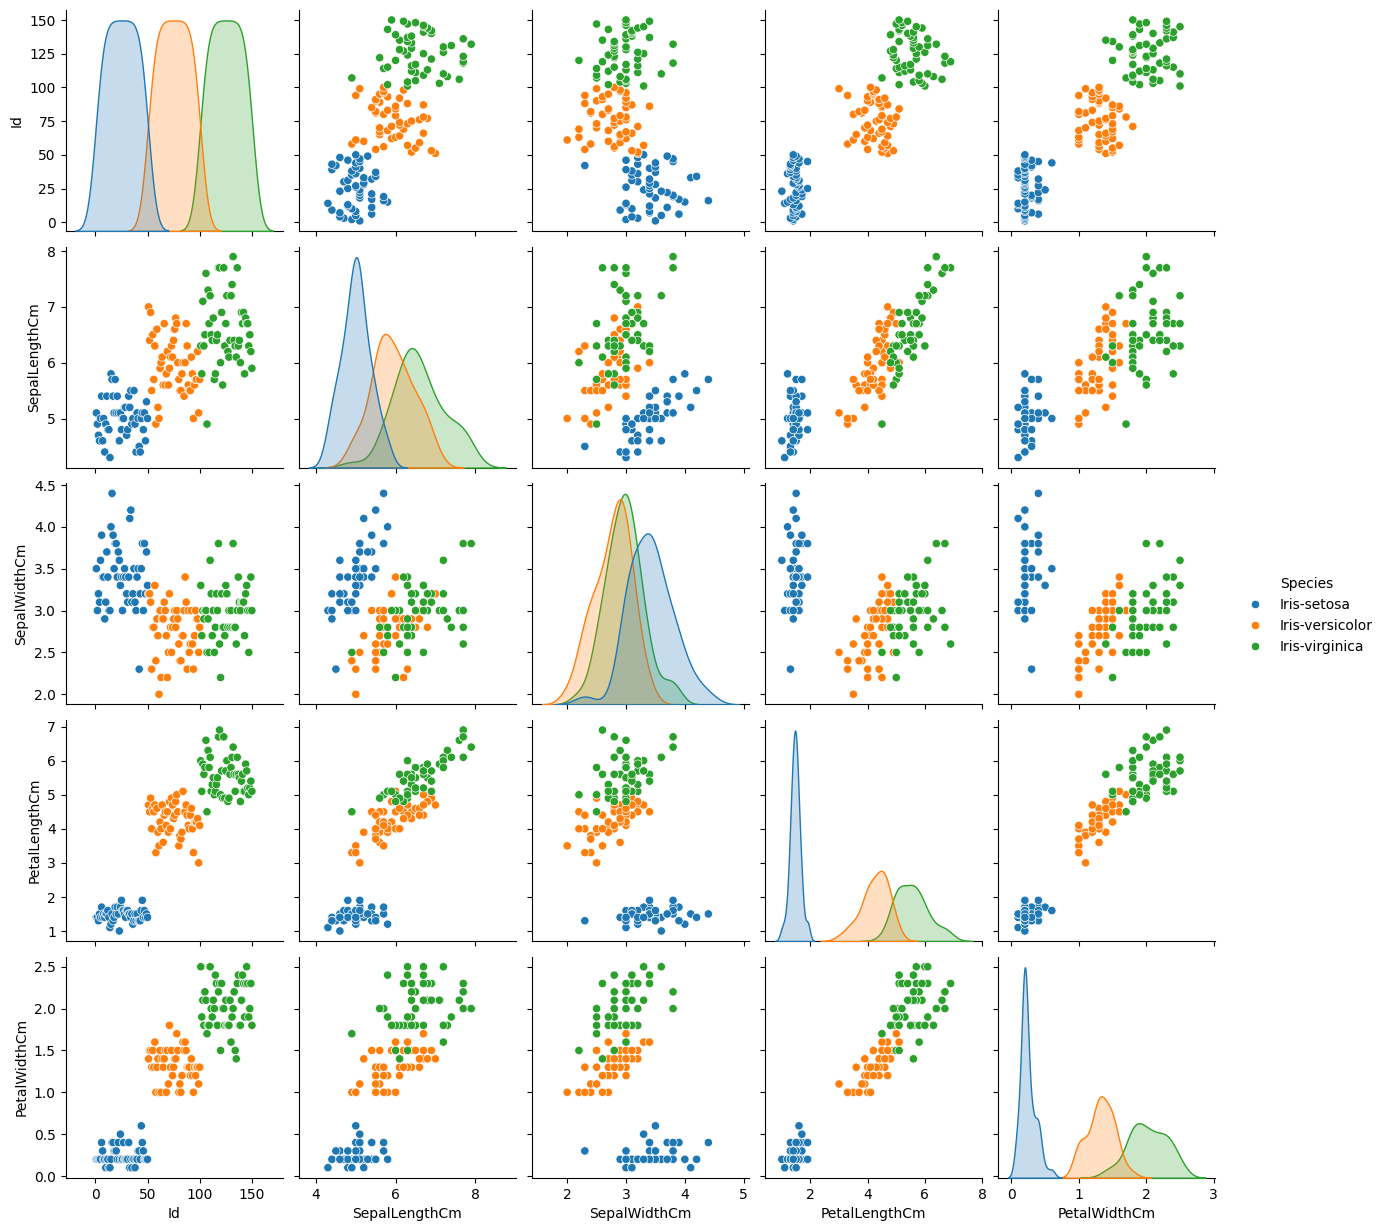

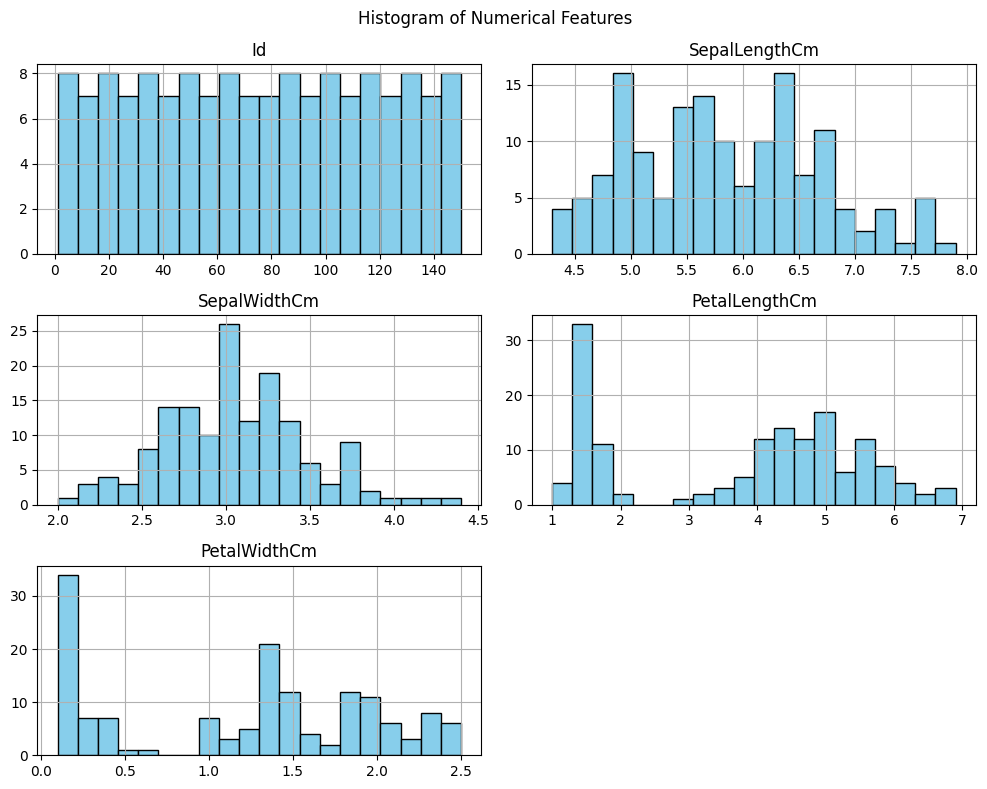

In [2]:
# Load the dataset
import pandas as pd

df = pd.read_csv('Iris.csv')

# Print the shape, column names, and first few rows
print("Shape: " , df.shape)
print("Columns: ", df.columns.tolist())
print("First 5 rows: ", df.head())

# info
print("\n dataset info: ")
df.info()

print("\n Summary and Statistics: ", df.describe())

# visualization

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='Species')
plt.show()

df.hist(figsize=(10,8),bins=20,color='skyblue', edgecolor='black')
plt.suptitle('Histogram of Numerical Features')
plt.tight_layout()
plt.show()


C:\Users\saade\AppData\Local\Temp\ipykernel_8080\1212317424.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('TSLA', start='2023-06-01', end='2024-06-01')
[*********************100%***********************]  1 of 1 completed


First 5 rows of data:
Price        Date       Close        High         Low        Open     Volume
Ticker                   TSLA        TSLA        TSLA        TSLA       TSLA
0      2023-06-01  207.520004  209.800003  199.369995  202.589996  148029900
1      2023-06-02  213.970001  217.250000  209.750000  210.149994  164129000
2      2023-06-05  217.610001  221.289993  214.520004  217.800003  151143100
3      2023-06-06  221.309998  221.910004  212.529999  216.139999  146911600
4      2023-06-07  224.570007  230.830002  223.199997  228.000000  185710800


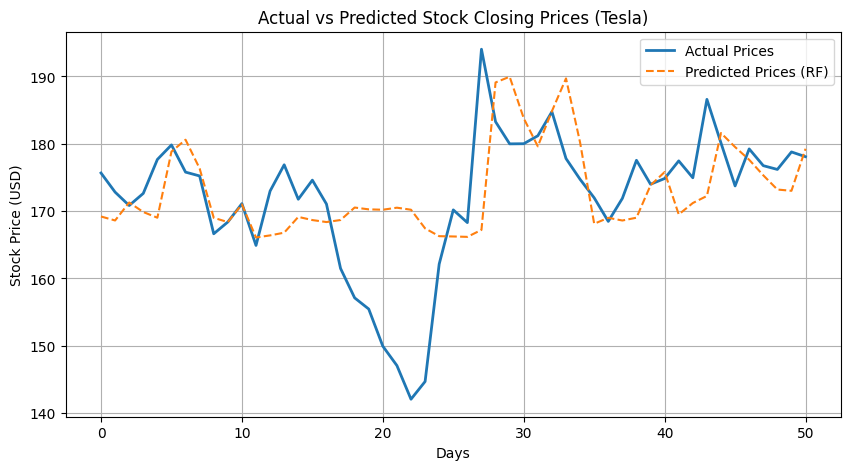

Mean Squared Error (Random Forest): 90.94


In [3]:
# 📦 Import required libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 📥 Step 1: Download historical stock data (Tesla in this case)
data = yf.download('TSLA', start='2023-06-01', end='2024-06-01')
data = data.reset_index()  # Reset index to make 'Date' a column
print("First 5 rows of data:")
print(data.head())

# 🧹 Step 2: Select relevant features and create target
# We'll use today's 'Open', 'High', 'Low', 'Volume' to predict tomorrow's 'Close'
df = data[['Open', 'High', 'Low', 'Volume', 'Close']]
df['Target'] = df['Close'].shift(-1)  # Next day's close as the target
df = df.dropna()  # Remove the last row which has NaN in 'Target'

# 🎯 Step 3: Define features (X) and target (y)
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Target']

# ✂️ Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# ⚙️ Step 4: Train a Linear Regression model (optional)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 🌲 Step 5: Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# 📊 Step 6: Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Prices', linewidth=2)
plt.plot(y_pred_rf, label='Predicted Prices (RF)', linestyle='--')
plt.title('Actual vs Predicted Stock Closing Prices (Tesla)')
plt.xlabel('Days')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# 🧮 Step 7: Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf:.2f}")


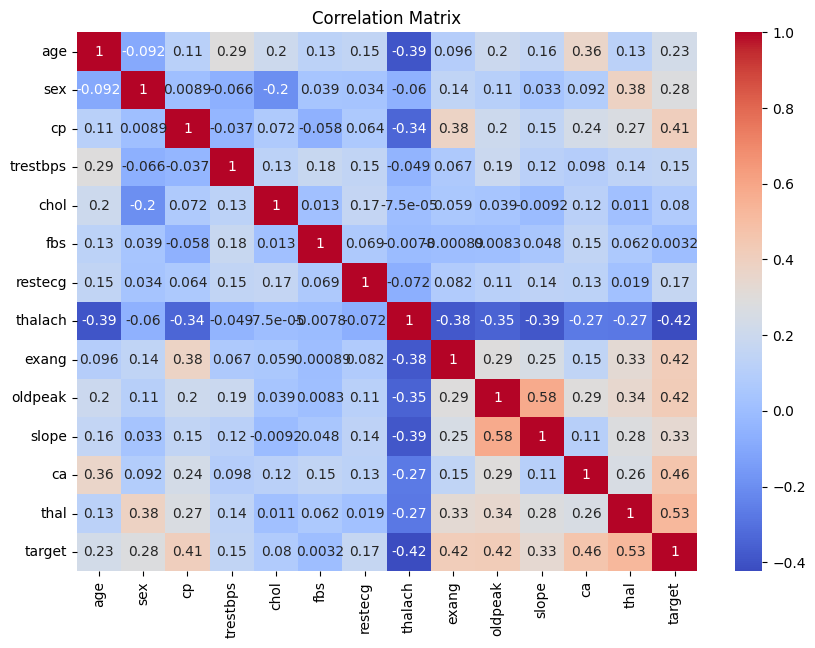

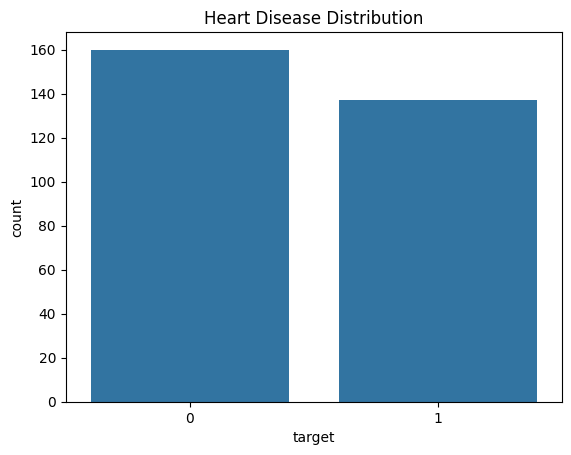

Logistic Regression Accuracy: 0.83
Logistic Regression ROC-AUC: 0.95


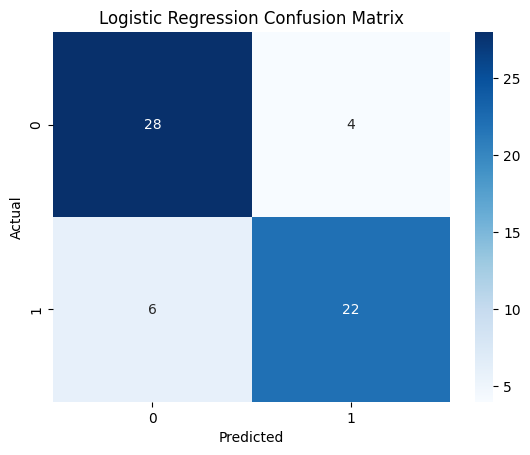

Decision Tree Accuracy: 0.70
Decision Tree ROC-AUC: 0.74


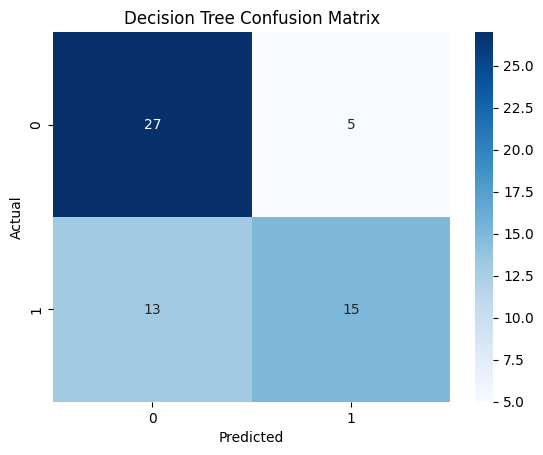

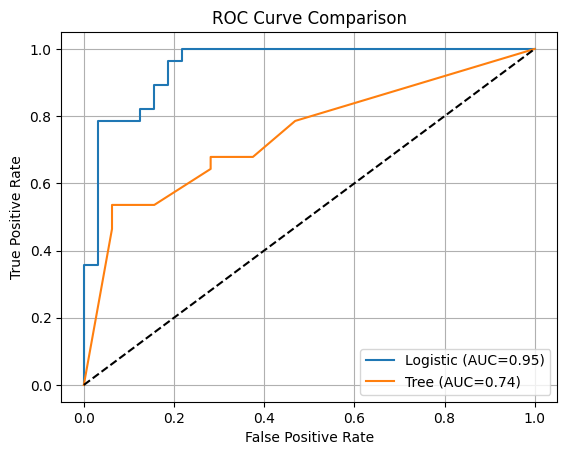

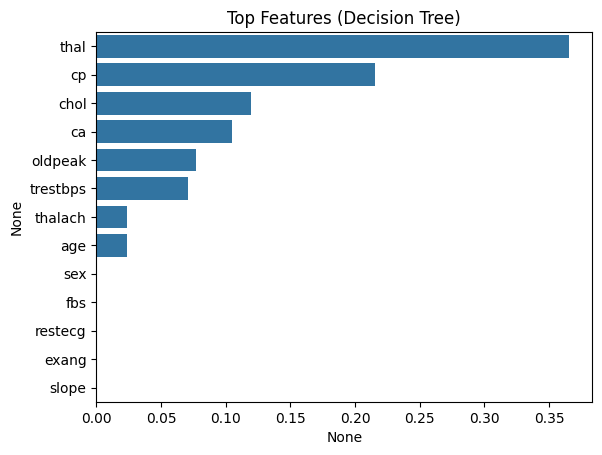

In [4]:
# 📦 Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# 📥 Load data from processed.cleveland.data
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv('processed.cleveland.data', names=column_names)

# 🧹 Clean data: handle '?', convert types, drop missing
df.replace('?', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# 🎯 Convert multi-class target to binary (0 = no disease, 1 = disease)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# 🔍 EDA: visualize correlation
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 📊 Target class distribution
sns.countplot(x='target', data=df)
plt.title('Heart Disease Distribution')
plt.show()

# 🧪 Train-test split
X = df.drop('target', axis=1)
y = df['target']

# 🔄 Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 🤖 Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

# 🌲 Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

# 📈 Evaluation function
def evaluate_model(name, y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    print(f"{name} Accuracy: {acc:.2f}")
    print(f"{name} ROC-AUC: {auc:.2f}")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 📊 Evaluate models
evaluate_model("Logistic Regression", y_test, y_pred_log, y_prob_log)
evaluate_model("Decision Tree", y_test, y_pred_tree, y_prob_tree)

# 📉 ROC Curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)

plt.plot(fpr_log, tpr_log, label=f'Logistic (AUC={roc_auc_score(y_test, y_prob_log):.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Tree (AUC={roc_auc_score(y_test, y_prob_tree):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

# 📌 Feature Importance from Decision Tree
importance = pd.Series(tree_model.feature_importances_, index=X.columns)
importance = importance.sort_values(ascending=False)
sns.barplot(x=importance, y=importance.index)
plt.title('Top Features (Decision Tree)')
plt.show()
